In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


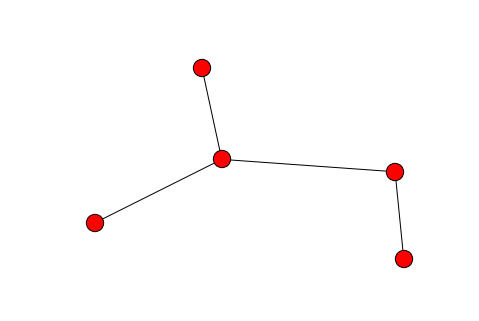

In [3]:
import networkx as nx

graph = nx.Graph()
graph.add_edge('台北101', '忠孝敦化', duration=5)
graph.add_edge('台北車站', '忠孝復興', duration=10)
graph.add_edge('忠孝復興', '忠孝敦化', duration=2)
graph.add_edge('忠孝敦化', '敦化南路二段', duration=10)

nx.draw(graph)


In [4]:
help(nx)

Help on package networkx:

NAME
    networkx

FILE
    c:\anaconda\lib\site-packages\networkx\__init__.py

DESCRIPTION
    NetworkX
    
        NetworkX (NX) is a Python package for the creation, manipulation, and
        study of the structure, dynamics, and functions of complex networks.
    
        https://networkx.lanl.gov/
    
    Using
    -----
    
        Just write in Python
    
        >>> import networkx as nx
        >>> G=nx.Graph()
        >>> G.add_edge(1,2)
        >>> G.add_node(42)
        >>> print(sorted(G.nodes()))
        [1, 2, 42]
        >>> print(sorted(G.edges()))
        [(1, 2)]

PACKAGE CONTENTS
    algorithms (package)
    classes (package)
    convert
    convert_matrix
    drawing (package)
    exception
    external (package)
    generators (package)
    linalg (package)
    readwrite (package)
    relabel
    release
    testing (package)
    tests (package)
    utils (package)
    version

SUBMODULES
    adjlist
    algebraicconnectivity
    all

In [5]:
nx?

In [6]:
dir(nx)

['DiGraph',
 'Graph',
 'GraphMLReader',
 'GraphMLWriter',
 'LCF_graph',
 'MultiDiGraph',
 'MultiGraph',
 'NetworkXAlgorithmError',
 'NetworkXError',
 'NetworkXException',
 'NetworkXNoPath',
 'NetworkXNotImplemented',
 'NetworkXPointlessConcept',
 'NetworkXTreewidthBoundExceeded',
 'NetworkXUnbounded',
 'NetworkXUnfeasible',
 '__author__',
 '__builtins__',
 '__date__',
 '__doc__',
 '__file__',
 '__license__',
 '__name__',
 '__package__',
 '__path__',
 '__version__',
 'absolute_import',
 'adamic_adar_index',
 'adj_matrix',
 'adjacency_matrix',
 'adjacency_spectrum',
 'adjlist',
 'algebraic_connectivity',
 'algebraicconnectivity',
 'algorithms',
 'all',
 'all_neighbors',
 'all_pairs_dijkstra_path',
 'all_pairs_dijkstra_path_length',
 'all_pairs_node_connectivity',
 'all_pairs_shortest_path',
 'all_pairs_shortest_path_length',
 'all_shortest_paths',
 'all_simple_paths',
 'ancestors',
 'approximate_current_flow_betweenness_centrality',
 'articulation_points',
 'assortativity',
 'astar',
 'a

In [7]:
print [node for node, connectionCount in nx.degree(graph).iteritems() if connectionCount > 2][0]

忠孝敦化


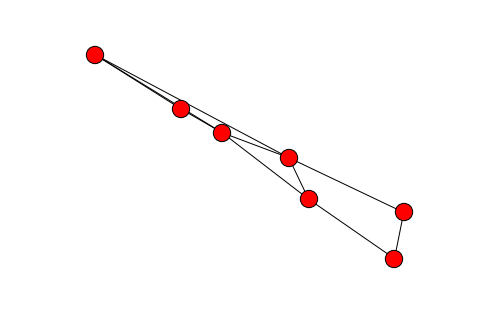

In [9]:
import networkx as nx

G=nx.Graph()

G.add_edge('a','b',weight=32)
G.add_edge('a','f',weight=3)
G.add_edge('b','c',weight=21)
G.add_edge('b','e',weight=12)
G.add_edge('b','f',weight=7)
G.add_edge('c','e',weight=6)
G.add_edge('c','g',weight=11)
G.add_edge('c','f',weight=2)
G.add_edge('d','e',weight=13)
G.add_edge('d','g',weight=9)

nx.draw(G)
# positions for all nodes
#pos=nx.spring_layout(G) 

C:\Anaconda\lib\site-packages\matplotlib\text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
C:\Anaconda\lib\site-packages\matplotlib\text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


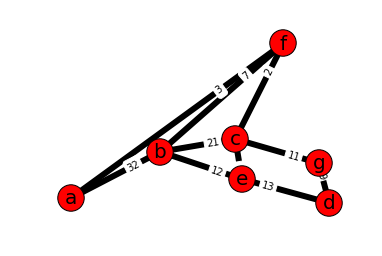

In [10]:
pos=nx.spring_layout(G) 

# nodes
nx.draw_networkx_nodes(G,pos,node_size=700)

# edges
nx.draw_networkx_edges(G,pos, width=6)

# edge label
nx.draw_networkx_edge_labels(G,pos, 
    {
        ("a","b"):"32",("a","f"):"3", ("b","c"):"21", ("b","e"):"12",("b","f"):"7", ("c","e"):"6",\
        ("c","g"):"11", ("d","e"):"13", ("d","g"):"9", ("c","f"):"2"
    },
    label_pos=0.3
)

# labels
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')

plt.axis('off')
plt.savefig("weighted_graph.png") # save as png
plt.show() # display

In [13]:
print nx.dijkstra_path(G, 'a', 'g', weight='weight')
#['a', 'f', 'c', 'g']
print nx.dijkstra_path_length(G, 'a', 'g', weight='weight')
#16

['a', 'f', 'c', 'g']
16


In [14]:
nx.astar_path(G, 'a', 'g', weight='weight')

['a', 'f', 'c', 'g']

In [17]:
from urllib import urlopen, urlencode
from json import loads

def geocode(address):
    url = 'https://maps.googleapis.com/maps/api/geocode/json?' + urlencode([
        ('address', address),
        ('sensor', 'false'),
    ])
    json = loads(urlopen(url).read())
    result = json['results'][0]
    formattedAddress = result['formatted_address']
    location = result['geometry']['location']
    longitude, latitude = location['lng'], location['lat']
    return dict(address=formattedAddress, longitude=longitude, latitude=latitude)

def geocodeLL(address):
    valueByKey = geocode(address)
    return valueByKey['longitude'], valueByKey['latitude']


In [96]:
from pysal.cg.kdtree import Arc_KDTree
earthRadiusInMeters = 6378100

address = ["台北市敦化南路二段206號", "台北市復興北路一段13號",\
            "小巨蛋", "台北101", "台灣師範大學", "台北教育大學", "政治大學",\
            "東吳大學", "文化大學", "台北市安和路二段23巷11號", "台灣科技大學",\
            "台灣大學" ]

pointsLL = []
for add in address:
    pointsLL.append(geocodeLL(add))
print pointsLL

[(121.5483674, 25.0224805), (121.5322985, 25.0463777), (121.549902, 25.0505355), (121.5644722, 25.0339639), (121.5273658, 25.0254571), (121.5453446, 25.023387), (121.575843, 24.9862332), (121.545936, 25.094537), (121.5394534, 25.1360953), (121.5530316, 25.0322455), (121.5416515, 25.0130679), (121.5397518, 25.0173405)]


In [97]:
from itertools import product, izip
k3 = Arc_KDTree(pointsLL, radius=earthRadiusInMeters)


In [98]:
import networkx as nx

G=nx.Graph()


In [99]:
for point in pointsLL:
    print point 

(121.5483674, 25.0224805)
(121.5322985, 25.0463777)
(121.549902, 25.0505355)
(121.5644722, 25.0339639)
(121.5273658, 25.0254571)
(121.5453446, 25.023387)
(121.575843, 24.9862332)
(121.545936, 25.094537)
(121.5394534, 25.1360953)
(121.5530316, 25.0322455)
(121.5416515, 25.0130679)
(121.5397518, 25.0173405)


In [100]:
print pointsLL[0], address[0]
print k3.query( pointsLL[0], 3)

(121.5483674, 25.0224805) 台北市敦化南路二段206號
(array([    0.        ,   321.17516794,  1040.52289201]), array([ 0,  5, 11]))


In [101]:
distances, indices =  k3.query( pointsLL[0], 3)
print distances
print indices

for idx in indices:
    print address[idx]

[    0.           321.17516794  1040.52289201]
[ 0  5 11]
台北市敦化南路二段206號
台北教育大學
台灣大學


In [102]:
for point in pointsLL:
    distances, indices = k3.query(point, 3)
    G.add_edge(indices[0], indices[1], weight=distances[1])
    G.add_edge(indices[0], indices[2], weight=distances[2])

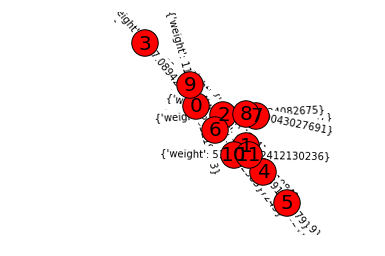

In [105]:
pos=nx.spring_layout(G) 

# nodes
nx.draw_networkx_nodes(G,pos,node_size=700)

# edges
nx.draw_networkx_edges(G,pos, width=6)

# edge label
nx.draw_networkx_edge_labels(G,pos,     label_pos=0.3
)
# labels
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')

plt.axis('off')
plt.savefig("weighted_graph.png") # save as png
plt.show() # display

In [106]:
address = ["台北市敦化南路二段206號", "台北市復興北路一段13號",\
            "小巨蛋", "台北101", "台灣師範大學", "台北教育大學", "政治大學",\
            "東吳大學", "文化大學", "台北市安和路二段23巷11號", "台灣科技大學",\
            "台灣大學" ]
for ele in nx.dijkstra_path(G, 4, 6, weight='weight'):
    print address[ele]

print nx.dijkstra_path_length(G, 4, 6, weight='weight')

台灣師範大學
台灣大學
台灣科技大學
政治大學
6617.85299703


In [ ]:
from networkx.algorithms import minimum_spanning_tree
optimized_graph = minimum_spanning_tree(G)

from networkx.algorithms import dfs_edges
list(dfs_edges(optimized_graph))


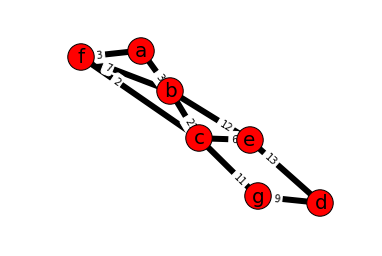

In [91]:
import networkx as nx

G=nx.Graph()

G.add_edge('a','b',weight=32)
G.add_edge('a','f',weight=3)
G.add_edge('b','c',weight=21)
G.add_edge('b','e',weight=12)
G.add_edge('b','f',weight=7)
G.add_edge('c','e',weight=6)
G.add_edge('c','g',weight=11)
G.add_edge('c','f',weight=2)
G.add_edge('d','e',weight=13)
G.add_edge('d','g',weight=9)

pos=nx.spring_layout(G) 

# nodes
nx.draw_networkx_nodes(G,pos,node_size=700)

# edges
nx.draw_networkx_edges(G,pos, width=6)

# edge label
nx.draw_networkx_edge_labels(G,pos, 
    {
        ("a","b"):"32",("a","f"):"3", ("b","c"):"21", ("b","e"):"12",("b","f"):"7", ("c","e"):"6",\
        ("c","g"):"11", ("d","e"):"13", ("d","g"):"9", ("c","f"):"2"
    },
    label_pos=0.3
)

# labels
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')

plt.axis('off')
plt.savefig("weighted_graph.png") # save as png
plt.show() # display

In [109]:
from networkx.algorithms import minimum_spanning_tree
optimized_graph = minimum_spanning_tree(G)

from networkx.algorithms import dfs_edges
#list(dfs_edges(optimized_graph))
for spot in list(dfs_edges(optimized_graph)):
    print address[spot[0]], address[spot[1]]

 台北市敦化南路二段206號 台北市安和路二段23巷11號
台北市安和路二段23巷11號 小巨蛋
小巨蛋 台北市復興北路一段13號
小巨蛋 東吳大學
東吳大學 文化大學
台北市安和路二段23巷11號 台北101
台北市敦化南路二段206號 台北教育大學
台北教育大學 台灣大學
台灣大學 台灣科技大學
台灣科技大學 政治大學
台灣大學 台灣師範大學


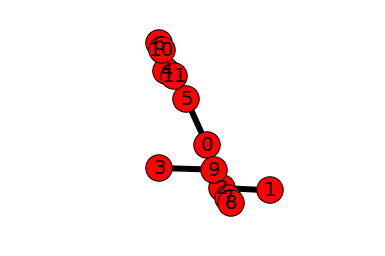

In [113]:
pos=nx.spring_layout(optimized_graph) 

# nodes
nx.draw_networkx_nodes(optimized_graph,pos,node_size=700)

# edges
nx.draw_networkx_edges(optimized_graph,pos, width=6)

# labels
nx.draw_networkx_labels(optimized_graph,pos,font_size=20,font_family='sans-serif')

plt.axis('off')
plt.savefig("weighted_graph.png") # save as png
plt.show() # display

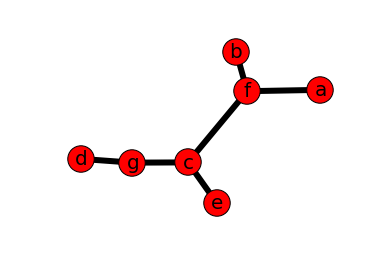

In [95]:
pos=nx.spring_layout(optimized_graph) 

# nodes
nx.draw_networkx_nodes(optimized_graph,pos,node_size=700)

# edges
nx.draw_networkx_edges(optimized_graph,pos, width=6)

# labels
nx.draw_networkx_labels(optimized_graph,pos,font_size=20,font_family='sans-serif')

plt.axis('off')
plt.savefig("weighted_graph.png") # save as png
plt.show() # display